# Projeto Câncer de Pulmão

O câncer de pulmão é responsável por um número significativo de mortes anuais. Esta doença caracteriza-se pelo crescimento descontrolado de células no pulmão, que pode se espalhar para outras partes do corpo. Fatores de risco como tabagismo, exposição a poluentes ambientais e substâncias tóxicas, além de predisposição genética, estão fortemente associados ao desenvolvimento da doença. O diagnóstico precoce e o tratamento adequado são fundamentais para aumentar as chances de sobrevivência, mas muitas vezes a doença é descoberta em estágios avançados, o que dificulta o sucesso terapêutico.

Este conjunto de dados consiste em 5.000 registros com 18 características relacionadas a fatores de risco e previsão de câncer de pulmão. Inclui informações demográficas, hábitos de vida, histórico médico e sintomas associados à doença pulmonar. O objetivo do projeto é realizar tratamento dos dados, análise exploratória e criação de modelo de machine learning com foco em previsão de risco de desenvolvimento de câncer de pulmão.

Fonte dos dados: [Kaggle](https://www.kaggle.com/datasets/shantanugarg274/lung-cancer-prediction-dataset)

## Dicionário de dados


`AGE` (idade): idade dos pacientes;

`GENDER`: sexo dos pacientes -> não há informação sobre qual é o 0 e qual é o 1

`SMOKING`: fumante -> 0 = Não, 1 = Sim;

`FINGER_DISCOLORATION`: descoloração dos dedos -> 0 = Não, 1 = Sim;

`MENTAL_STRESS`: estresse mental -> 0 = Não, 1 = Sim;

`EXPOSURE_TO_POLLUTION`: exposição à poluição -> 0 = Não, 1 = Sim;

`LONG_TERM_ILLNESS`: doença prolongada -> 0 = Não, 1 = Sim;

`ENERGY_LEVEL`: nível de energia dos pacientes;

`IMMUNE_WEAKNESS`: imunidade comprometida -> 0 = Não, 1 = Sim;

`BREATHING_ISSUE`: problemas respiratórios -> 0 = Não, 1 = Sim;

`ALCOHOL_CONSUMPTION`: consumo de álcool -> 0 = Não, 1 = Sim;

`THROAT_DISCOMFORT`: desconforto na garganta -> 0 = Não, 1 = Sim;

`OXYGEN_SATURATION`: saturação de oxigênio no sangue;

`CHEST_TIGHTNESS`: dor no peito -> 0 = Não, 1 = Sim;

`FAMILY_HISTORY`: histórico familiar de câncer de pulmão -> 0 = Não, 1 = Sim;

`SMOKING_FAMILY_HISTORY`: fumantes na família -> 0 = Não, 1 = Sim;

`STRESS_IMMUNE`: estresse imune -> 0 = Não, 1 = Sim;

`PULMONARY_DISEASE`: paciente está com câncer de pulmão -> 0 = Não, 1 = Sim;

Observação: não há informações detalhadas sobre as features, como por exemplo, quanto de exposição à poluição é considerado para categorizar como "Sim" (pois atualmente pelo menos um pouco de poluição todos estão sujeitos), dentre outros detalhes.

## Importações e ajustes iniciais

In [ ]:
# Frameworks
import pandas as pd
import numpy as np

# Gráficas
import matplotlib.pyplot as plt
import seaborn as sns

# Estatísticas
from scipy.stats import chi2_contingency

# Configurações
from src.config import DADOS_LIMPOS
from src.graphics import PALETTE

# Avisos
import warnings

In [ ]:
# Ajustes
warnings.filterwarnings("ignore")
pd.options.display.float_format = "{:,.2f}".format

# Layout
sns.set_theme(style="darkgrid", context="notebook", palette=PALETTE)

## Análise exploratória

### Verificação inicial dos dados

In [ ]:
df = pd.read_parquet(DADOS_LIMPOS)

In [ ]:
df.head()

,age,gender,smoking,finger_discoloration,mental_stress,exposure_to_pollution,long_term_illness,energy_level,immune_weakness,breathing_issue,alcohol_consumption,throat_discomfort,oxygen_saturation,chest_tightness,family_history,smoking_family_history,stress_immune,pulmonary_disease
0,68,1,Yes,Yes,Yes,Yes,No,57.83,No,No,Yes,Yes,95.98,Yes,No,No,No,No
1,81,1,Yes,No,No,Yes,Yes,47.69,Yes,Yes,No,Yes,97.18,No,No,No,No,Yes
2,58,1,Yes,No,No,No,No,59.58,No,Yes,Yes,No,94.97,No,No,No,No,No
3,44,0,Yes,No,Yes,Yes,No,59.79,No,Yes,No,Yes,95.19,No,No,No,No,Yes
4,72,0,Yes,Yes,Yes,Yes,Yes,59.73,No,Yes,No,Yes,93.50,No,No,No,No,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   age                     5000 non-null   int8    
 1   gender                  5000 non-null   int64   
 2   smoking                 5000 non-null   category
 3   finger_discoloration    5000 non-null   category
 4   mental_stress           5000 non-null   category
 5   exposure_to_pollution   5000 non-null   category
 6   long_term_illness       5000 non-null   category
 7   energy_level            5000 non-null   float64 
 8   immune_weakness         5000 non-null   category
 9   breathing_issue         5000 non-null   category
 10  alcohol_consumption     5000 non-null   category
 11  throat_discomfort       5000 non-null   category
 12  oxygen_saturation       5000 non-null   float64 
 13  chest_tightness         5000 non-null   category
 14  family_history          

Como a coluna "gender" perdeu o tipo categórico, ele será colocado novamente.

In [ ]:
df["gender"] = df["gender"].astype("category")

### Entendimento dos dados

In [ ]:
numeric_columns = ["age", "energy_level", "oxygen_saturation"]
target_column = "pulmonary_disease"
binary_columns = [column for column in df.columns if column not in (numeric_columns + [target_column])]

#### Colunas numéricas

In [ ]:
df.describe()

,age,energy_level,oxygen_saturation
count,"5,000.00","5,000.00","5,000.00"
mean,57.22,55.03,94.99
std,15.80,7.91,1.48
min,30.00,23.26,89.92
25%,44.00,49.44,93.97
50%,57.00,55.05,94.97
75%,71.00,60.32,95.99
max,84.00,83.05,99.80


Para as colunas categórias, em uma análise breve, é possível perceber que a coluna "age" possui uma boa faixa de distribuição, desde pessoas com 30 anos até com 84 anos. Não espera-se pessoas muito novas com desenvolvimento de câncer de pulmão. Apesar de ser possível, esses casos em geral são de forte fator genético e com pouca contribuição ambiental, então a faixa está dentro de valores esperados.

As outras duas colunas parecem ter distribuições com uma variação menor que a "age" e com distribuição próxima à normal.

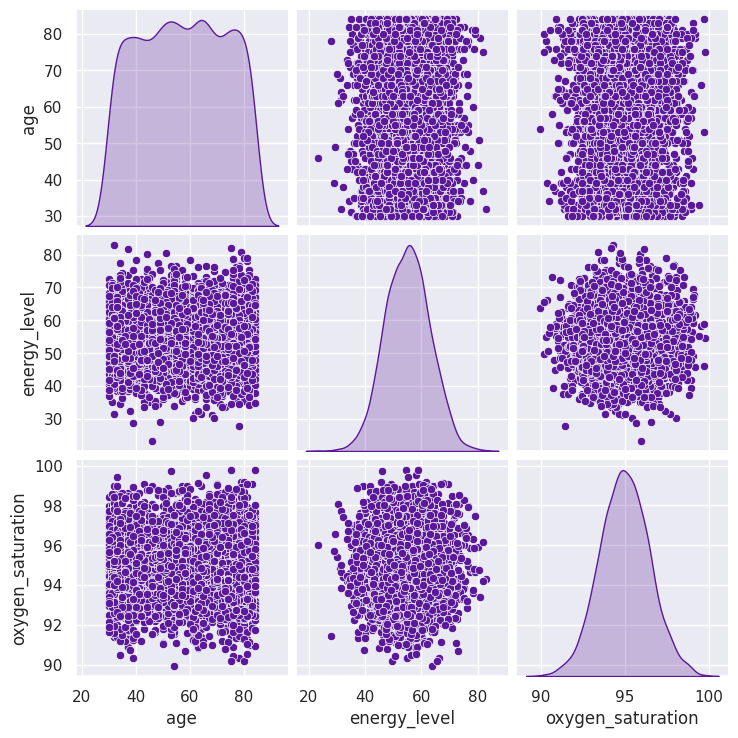

In [ ]:
sns.pairplot(df, diag_kind="kde")

Os gráficos reforçam as observações obtidas por meio das estatísticas anteriores. Adicionalmente, é possível perceber que as colunas numéricas não possuem nenhuma relação linear evidente entre elas.

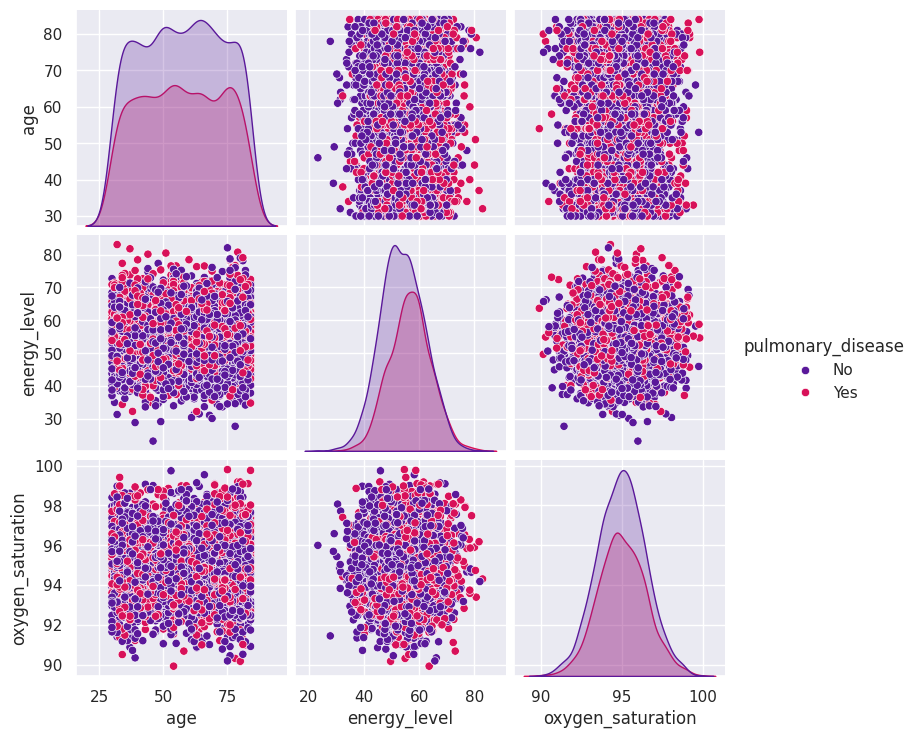

In [ ]:
sns.pairplot(df, diag_kind="kde", hue=target_column)

Também não é possível distinguir nenhuma separação clara entre os grupos que desenvolveram e não desenvolveram câncer de pulmão por meio da relação entre as variáveis numéricas.

In [ ]:
corr_matrix = df.corr(numeric_only=True).style.format(precision=2).background_gradient(cmap='coolwarm_r', vmin=-1, vmax=1)
corr_matrix

,age,energy_level,oxygen_saturation
age,1.00,-0.01,-0.00
energy_level,-0.01,1.00,0.01
oxygen_saturation,-0.00,0.01,1.00


A matriz de correlação também reforça que não há correlação entre as variáveis numéricas.

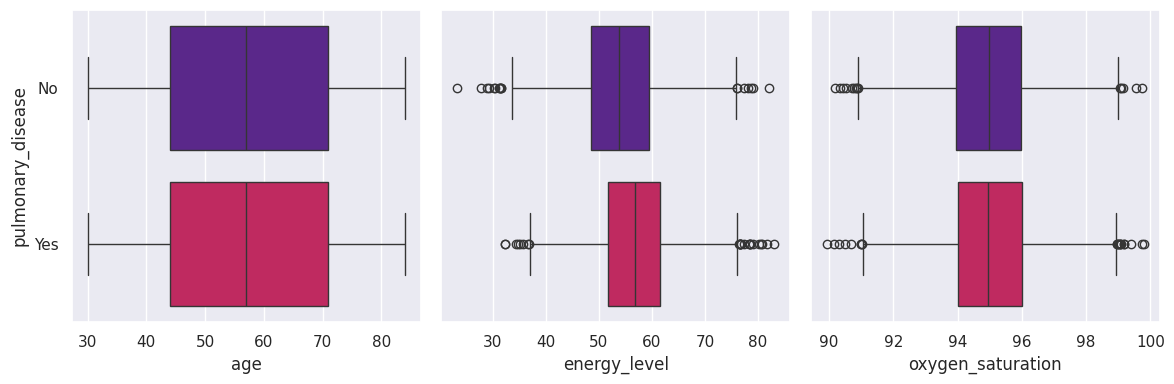

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 4), tight_layout=True, sharey=True)
for i, column in enumerate(numeric_columns):
  sns.boxplot(x=column, y=target_column, data=df, hue=target_column, ax=axs[i])
plt.show()

A análise dos boxplots também reforça que as colunas numéricas não separam bem as pessoas com e sem desfecho de câncer de pulmão.

#### Colunas categóricas

In [ ]:
df.describe(exclude='number')

,gender,smoking,finger_discoloration,mental_stress,exposure_to_pollution,long_term_illness,immune_weakness,breathing_issue,alcohol_consumption,throat_discomfort,chest_tightness,family_history,smoking_family_history,stress_immune,pulmonary_disease
count,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000
unique,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,1,Yes,Yes,Yes,Yes,No,No,Yes,No,Yes,Yes,No,No,No,No
freq,2506,3332,3006,2699,2580,2804,3026,4002,3229,3491,3003,3491,3980,3952,2963


Dentre as colunas categóricas, em uma análise simples podemos observar:
- As colunas "gender", "mental_stress", "exposure_to_pollution" e "long_term_illness" possuem as duas categorias bem distribuídas;
- As colunas "smoking", "finger_discoloration", "breathing_issue", "throat_discomfort" e "chest_tightness" possuem um pouco mais de valores "Yes";
- As colunas "immune_weakness", "alcohol_consumption", "family_history" e "pulmonary_disease" possuem um pouco mais de valores "No";
- As colunas "smoking_family_history" e "stress_immune" possuem muito mais valores "No" do que "Yes".

O fato da coluna alvo possuir apenas um desbalanceamento leve é uma informação importante para etapas futuras de machine learning. De modo geral, todas as categorias estão relativamente bem representadas.

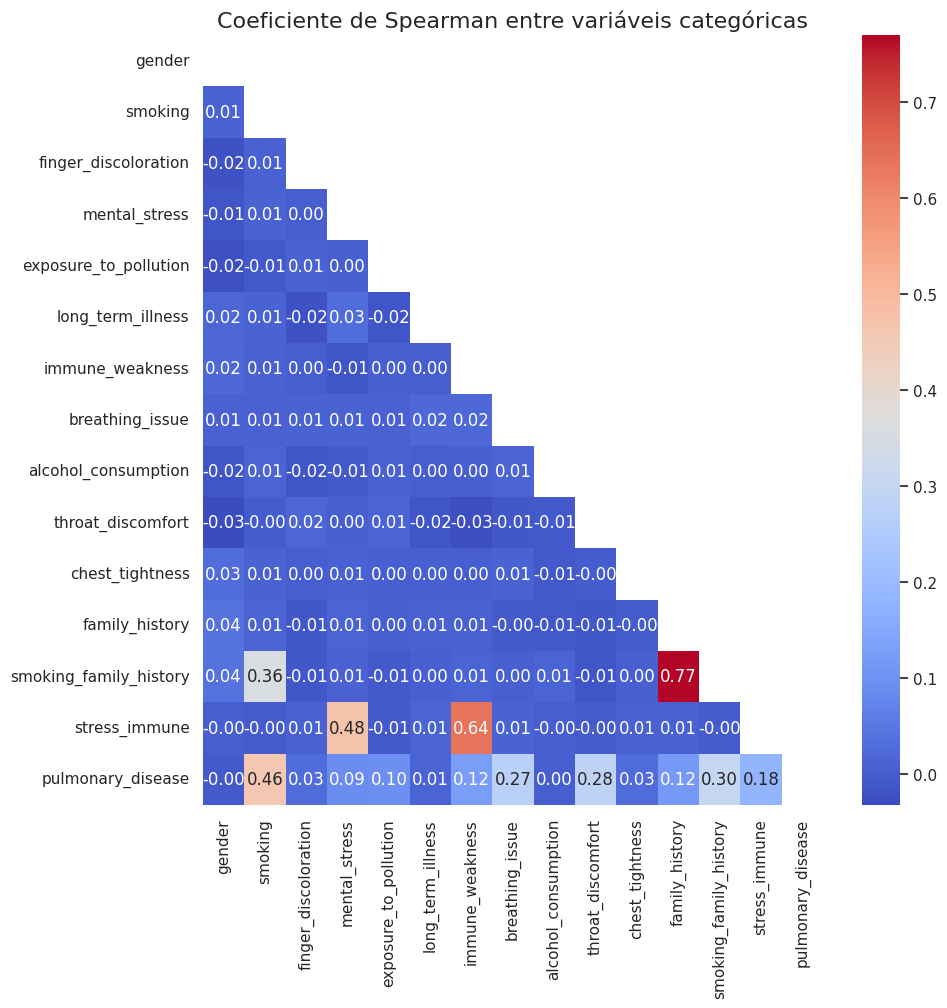

In [ ]:
corr_categoricas = df.select_dtypes('category').apply(lambda coluna: coluna.cat.codes).corr(method='spearman', numeric_only=False)

fig, ax = plt.subplots(figsize=(10, 10))
matrix = np.triu(corr_categoricas)
corr = sns.heatmap(corr_categoricas, mask=matrix, annot=True, fmt='.2f', ax=ax, cmap='coolwarm')
corr.grid(False)
ax.set_facecolor('white')
plt.title('Coeficiente de Spearman entre variáveis categóricas', fontsize=16)
plt.show()

A maior parte das colunas não estão correlacionadas. As correlações mais importantes a se mencionar são:
- Histórico familiar de consumo de cigarro estão altamente correlacionados com histórico familiar de câncer de pulmão;
- Estresse imune está bem correlacionado com comprometimento da imunidade;
- Estresse mental está correlacionado com estresse imune;
- Fumo está correlacionado com o desfecho de câncer de pulmão.

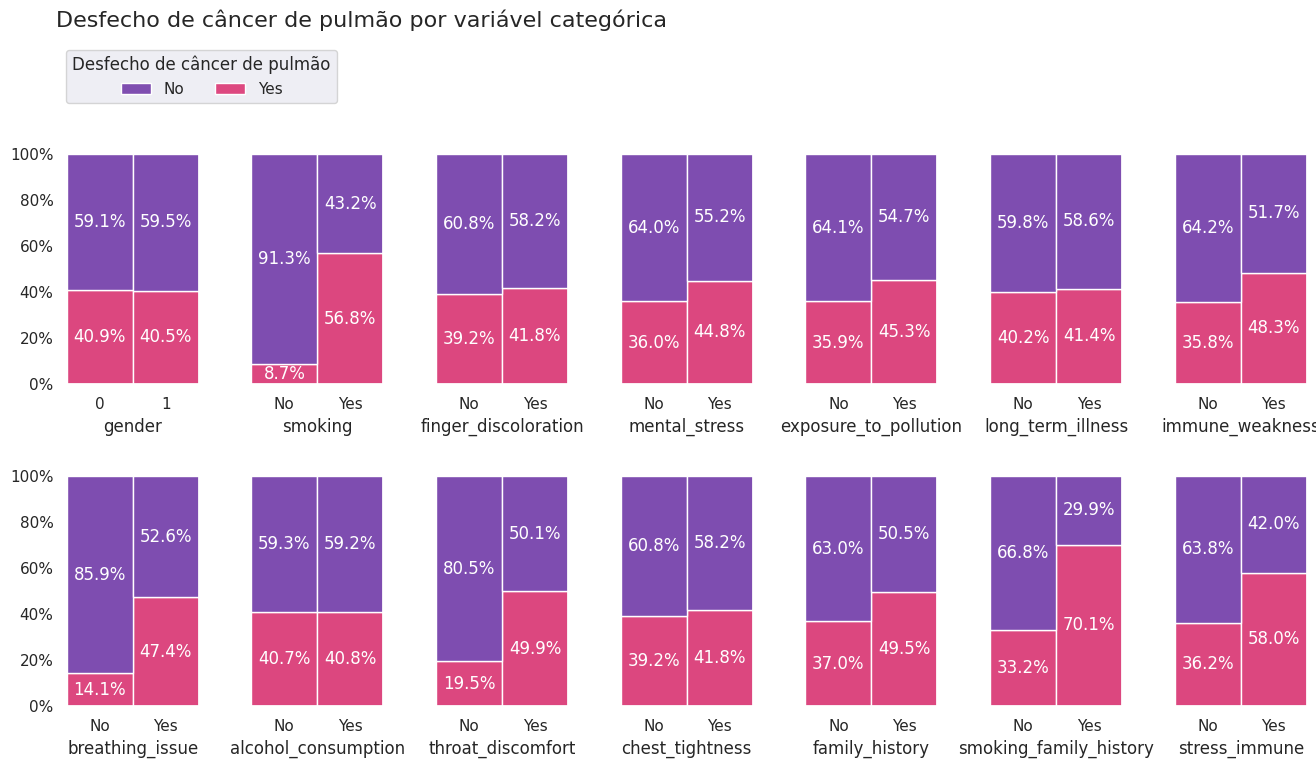

In [ ]:
from matplotlib.ticker import PercentFormatter # Se for usar este gráfico, subir esta importação

fig, axs = plt.subplots(nrows=2, ncols=7, figsize=(16, 8), sharey=True)

for i, column in enumerate(binary_columns):
  hist = sns.histplot(x=column, data=df, hue=target_column, multiple="fill", ax=axs.flat[i], stat="percent", common_norm=True)
  hist.grid(False)
  hist.yaxis.set_major_formatter(PercentFormatter(1))
  hist.set_ylabel("")

  for bar in hist.containers:
    hist.bar_label(bar, label_type="center", labels=[f"{particao.get_height():.1%}" for particao in bar], color="white")

  legenda = hist.get_legend()
  legenda.remove()

rotulos = [text.get_text() for text in legenda.get_texts()]
fig.legend(handles=legenda.legend_handles, labels=rotulos, loc="upper left", ncols=2, title="Desfecho de câncer de pulmão", bbox_to_anchor=(0.12, 0.94))
fig.suptitle("Desfecho de câncer de pulmão por variável categórica", ha="right", fontsize=16)
fig.align_labels()
plt.subplots_adjust(wspace=0.4, hspace=0.4, top=0.8)

plt.show()

O desfecho de câncer de pulmão não parece possuir muita relação com as categorias gênero, descoloração dos dedos, doença prolongada, consumo de álcool e dor no peito.

Parece haver certa relação das categorias estresse mental, exposição à poluição, fraqueza imune e histórico familiar de câncer de pulmão com desfecho de câncer de pulmão.

Já para as categorias fumante, problemas respiratórios, desconforto na garganta, histórico familiar de fumo e estresse imune, parece que pesssoas com desfecho de câncer de pulmão respondem muito mais "Sim" do que pessoas sem o desfecho.

Para avaliar se essas diferenças observadas são estatisticamente significantes, podem ser realizados testes estatísticos.

In [ ]:
contingency_table = {}

for column in df.select_dtypes('category').columns:
  if column != target_column:
    contingency_table[column] = pd.crosstab(df[target_column], df[column])

In [ ]:
for column, table in contingency_table.items():
  chi2, p_value, _, _ = chi2_contingency(table)
  significance_text = "significativa" if p_value <= 0.05 else "não significativa"
  print(f'{column}: Diferença {significance_text} considerando alfa de 0.05 (estatítica={chi2:.4f} e valor p={p_value:.4f}).\n')

gender: Diferença não significativa considerando alfa de 0.05 (estatítica=0.0655 e valor p=0.7981).

smoking: Diferença significativa considerando alfa de 0.05 (estatítica=1062.7695 e valor p=0.0000).

finger_discoloration: Diferença não significativa considerando alfa de 0.05 (estatítica=3.2896 e valor p=0.0697).

mental_stress: Diferença significativa considerando alfa de 0.05 (estatítica=39.5678 e valor p=0.0000).

exposure_to_pollution: Diferença significativa considerando alfa de 0.05 (estatítica=44.9488 e valor p=0.0000).

long_term_illness: Diferença não significativa considerando alfa de 0.05 (estatítica=0.7417 e valor p=0.3891).

immune_weakness: Diferença significativa considerando alfa de 0.05 (estatítica=77.2764 e valor p=0.0000).

breathing_issue: Diferença significativa considerando alfa de 0.05 (estatítica=364.3768 e valor p=0.0000).

alcohol_consumption: Diferença não significativa considerando alfa de 0.05 (estatítica=0.0000 e valor p=1.0000).

throat_discomfort: Difer

As características sexo, descoloração dos dedos, doença prolongada, consumo de álcool e dor no peito não possuem diferenças significativas entre pessoas com e sem câncer de pulmão, podendo não influenciar no desfecho.

Já para as características fumante, estresse mental, fraqueza imune, problemas de respiração, exposição à poluição, desconforto na garganta, histórico familiar de câncer de pulmão, histórico familiar de fumo e estresse imune há pelo menos uma categoria significativamente diferente das demais em relação ao desfecho de câncer de pulmão.

Esses resultados corroboram a análise feita a partir dos gráficos.
